# Example using motile (Multi-Object Tracker using Integer Linear Equations)

In [2]:
from motile.costs import NodeSelection, EdgeDistance, Appear, Split
from motile.constraints import MaxParents, MaxChildren
from motile.variables import EdgeSelected
import motile 

In [23]:
def test_solver_motile(nodes, edges, appear_cost=200, split_cost=100, max_children=1):
    
    graph = motile.TrackGraph()
    
    graph.add_nodes_from([
        (node['id'], node)
        for node in nodes
    ])
    
    graph.add_edges_from([
        (edge['source'], edge['target'], edge)
        for edge in edges
    ])
    
    solver = motile.Solver(graph)
    
    solver.add_costs(
        NodeSelection(
            weight=-1.0,
            attribute='score',
            constant=-100.0))
    
    solver.add_costs(EdgeDistance(position_attributes=('x',)))
    
    solver.add_costs(Appear(constant=appear_cost))
    solver.add_costs(Split(constant=split_cost))
    
    solver.add_constraints(MaxParents(1))
    solver.add_constraints(MaxChildren(max_children))
    
    solution = solver.solve()
    
    edge_indicators = solver.get_variables(EdgeSelected)
    
    selected_edges = [
        edge
        for edge, variable in edge_indicators.items()
        if solution[variable] > 0.5
    ]
    
    print(f"\n Selected edges: {selected_edges} \n \n") 

In [24]:
'''
* Very simple case: 2 trajectories (e.g flies) over 3 frames
* Just consider x dim for now. Take euclidean distance as cost
* Edge between id 0 (x = 101) and id 2 (x = 100) -> 1.0 (should be selected)
* Edge between id 1 (x = 150) and id 2 (c = 100) -> 50.0 (should not be selected)

   x            
   |         
150|   1---3---5
   |     x   x
100|   0---2---4
    ------------------------------------ t
       0   1   2
'''
    
nodes = [
            {'id': 0, 't': 0, 'x': 101, 'score': 1.0},
            {'id': 1, 't': 0, 'x': 150, 'score': 1.0},
            {'id': 2, 't': 1, 'x': 100, 'score': 1.0},
            {'id': 3, 't': 1, 'x': 151, 'score': 1.0},
            {'id': 4, 't': 2, 'x': 102, 'score': 1.0},
            {'id': 5, 't': 2, 'x': 149, 'score': 1.0},
]

edges = [
        {'source': 0, 'target': 2, 'distance': 1.0},
        {'source': 1, 'target': 3, 'distance': 1.0},
        {'source': 0, 'target': 3, 'distance': 50.0},
        {'source': 1, 'target': 2, 'distance': 50.0},
        {'source': 2, 'target': 4, 'distance': 2.0},
        {'source': 3, 'target': 5, 'distance': 2.0},
        {'source': 2, 'target': 5, 'distance': 49.0},
        {'source': 3, 'target': 4, 'distance': 49.0},
]

test_solver_motile(nodes, edges)

INFO:motile.solver:Adding SelectEdgeNodes constraints...
INFO:motile.solver:Adding NodeSelected variables...
INFO:motile.solver:Adding EdgeSelected variables...
INFO:motile.solver:Adding NodeSelection costs...
INFO:motile.solver:Adding EdgeDistance costs...
INFO:motile.solver:Adding Appear costs...
INFO:motile.solver:Adding NodeAppear variables...
INFO:motile.solver:Adding Split costs...
INFO:motile.solver:Adding NodeSplit variables...
INFO:motile.solver:Adding MaxParents constraints...
INFO:motile.solver:Adding MaxChildren constraints...
Could not create Gurobi backend: Gurobi error in pylp/impl/solvers/GurobiBackend.cpp:22: No Gurobi license found (user asheridan, host bpho, hostid 921f398a, cores 8)

 Selected edges: [(0, 2), (1, 3), (2, 4), (3, 5)] 
 

presolving:
(round 1, fast)       6 del vars, 12 del conss, 0 add conss, 2 chg bounds, 8 chg sides, 8 chg coeffs, 0 upgd conss, 0 impls, 20 clqs
(round 2, exhaustive) 6 del vars, 16 del conss, 0 add conss, 2 chg bounds, 12 chg sides,

In [25]:
'''
* Same example but now we have an extra node (6)

   x            
   |
200|           6
   |         /
150|   1---3---5
   |     x   x
100|   0---2---4
    ------------------------------------ t
       0   1   2
'''

nodes = [
        {'id': 0, 't': 0, 'x': 101, 'score': 1.0},
        {'id': 1, 't': 0, 'x': 150, 'score': 1.0},
        {'id': 2, 't': 1, 'x': 100, 'score': 1.0},
        {'id': 3, 't': 1, 'x': 151, 'score': 1.0},
        {'id': 4, 't': 2, 'x': 102, 'score': 1.0},
        {'id': 5, 't': 2, 'x': 149, 'score': 1.0},
        {'id': 6, 't': 2, 'x': 200, 'score': 1.0}
]

edges = [
    {'source': 0, 'target': 2, 'distance': 1.0},
    {'source': 1, 'target': 3, 'distance': 1.0},
    {'source': 0, 'target': 3, 'distance': 50.0},
    {'source': 1, 'target': 2, 'distance': 50.0},
    {'source': 2, 'target': 4, 'distance': 2.0},
    {'source': 3, 'target': 5, 'distance': 2.0},
    {'source': 2, 'target': 5, 'distance': 49.0},
    {'source': 3, 'target': 4, 'distance': 49.0},
    {'source': 3, 'target': 6, 'distance': 3.0}
]

In [26]:
# won't select (3,6)
test_solver_motile(nodes, edges)

INFO:motile.solver:Adding SelectEdgeNodes constraints...
INFO:motile.solver:Adding NodeSelected variables...
INFO:motile.solver:Adding EdgeSelected variables...
INFO:motile.solver:Adding NodeSelection costs...
INFO:motile.solver:Adding EdgeDistance costs...
INFO:motile.solver:Adding Appear costs...
INFO:motile.solver:Adding NodeAppear variables...
INFO:motile.solver:Adding Split costs...
INFO:motile.solver:Adding NodeSplit variables...
INFO:motile.solver:Adding MaxParents constraints...
INFO:motile.solver:Adding MaxChildren constraints...
Could not create Gurobi backend: Gurobi error in pylp/impl/solvers/GurobiBackend.cpp:22: No Gurobi license found (user asheridan, host bpho, hostid 921f398a, cores 8)

 Selected edges: [(0, 2), (1, 3), (2, 4), (3, 5)] 
 

presolving:
(round 1, fast)       7 del vars, 16 del conss, 0 add conss, 2 chg bounds, 8 chg sides, 8 chg coeffs, 0 upgd conss, 0 impls, 21 clqs
(round 2, exhaustive) 7 del vars, 21 del conss, 0 add conss, 2 chg bounds, 11 chg sides,

In [27]:
# won't select (3,6)
test_solver_motile(nodes, edges, max_children=2)

INFO:motile.solver:Adding SelectEdgeNodes constraints...
INFO:motile.solver:Adding NodeSelected variables...
INFO:motile.solver:Adding EdgeSelected variables...
INFO:motile.solver:Adding NodeSelection costs...
INFO:motile.solver:Adding EdgeDistance costs...
INFO:motile.solver:Adding Appear costs...
INFO:motile.solver:Adding NodeAppear variables...
INFO:motile.solver:Adding Split costs...
INFO:motile.solver:Adding NodeSplit variables...
INFO:motile.solver:Adding MaxParents constraints...
INFO:motile.solver:Adding MaxChildren constraints...
Could not create Gurobi backend: Gurobi error in pylp/impl/solvers/GurobiBackend.cpp:22: No Gurobi license found (user asheridan, host bpho, hostid 921f398a, cores 8)

 Selected edges: [(0, 2), (1, 3), (2, 4), (3, 5)] 
 

presolving:
(round 1, fast)       7 del vars, 19 del conss, 0 add conss, 2 chg bounds, 8 chg sides, 8 chg coeffs, 0 upgd conss, 0 impls, 17 clqs
(round 2, exhaustive) 7 del vars, 21 del conss, 0 add conss, 2 chg bounds, 8 chg sides, 

In [28]:
# lowering the split cost will select (3,6)
test_solver_motile(nodes, edges, split_cost=10, max_children=2)

INFO:motile.solver:Adding SelectEdgeNodes constraints...
INFO:motile.solver:Adding NodeSelected variables...
INFO:motile.solver:Adding EdgeSelected variables...
INFO:motile.solver:Adding NodeSelection costs...
INFO:motile.solver:Adding EdgeDistance costs...
INFO:motile.solver:Adding Appear costs...
INFO:motile.solver:Adding NodeAppear variables...
INFO:motile.solver:Adding Split costs...
INFO:motile.solver:Adding NodeSplit variables...
INFO:motile.solver:Adding MaxParents constraints...
INFO:motile.solver:Adding MaxChildren constraints...

 Selected edges: [(0, 2), (1, 3), (2, 4), (3, 5), (3, 6)] 
 
Could not create Gurobi backend: Gurobi error in pylp/impl/solvers/GurobiBackend.cpp:22: No Gurobi license found (user asheridan, host bpho, hostid 921f398a, cores 8)

presolving:
(round 1, fast)       7 del vars, 19 del conss, 0 add conss, 2 chg bounds, 8 chg sides, 8 chg coeffs, 0 upgd conss, 0 impls, 17 clqs
(round 2, exhaustive) 7 del vars, 21 del conss, 0 add conss, 2 chg bounds, 8 chg

# Example integration with SLEAP

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sleap

In [30]:
labels = sleap.load_file('test_data/190612_110405_wt_18159111_rig2.2@11730.slp')

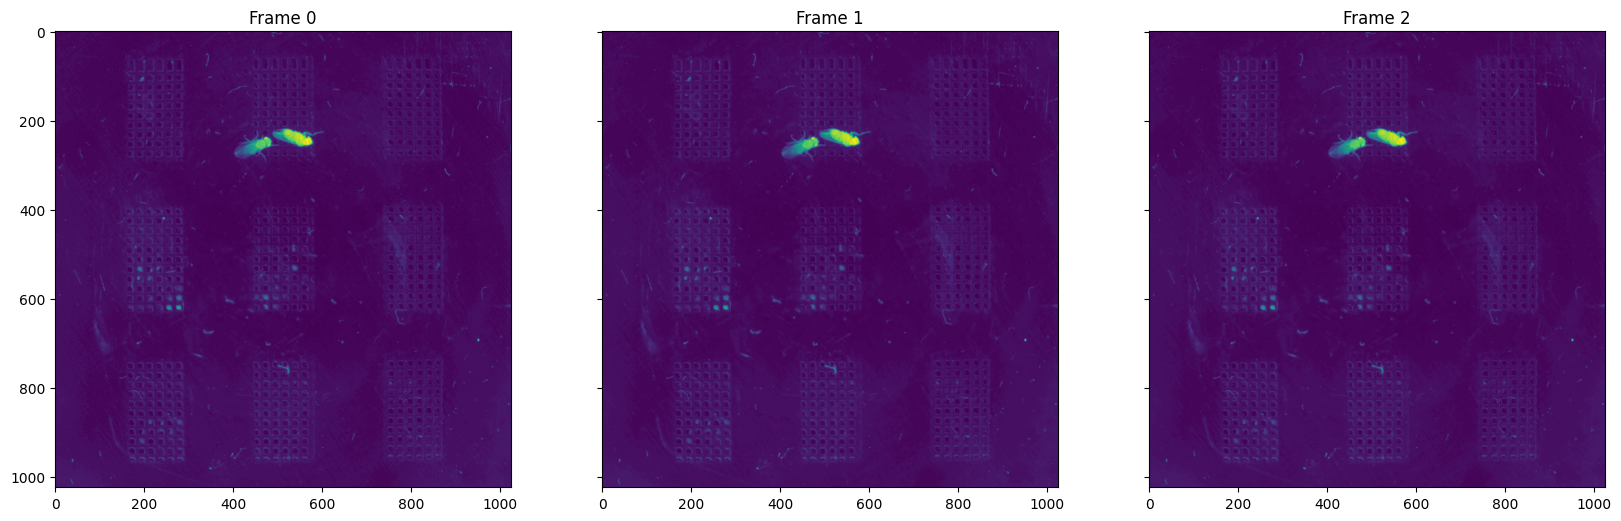

In [31]:
fig, axes = plt.subplots(
            1,
            3,
            figsize=(20, 6),
            sharex=True,
            sharey=True,
            squeeze=False)

for i in range(3):
    sec = labels.video[i]

    axes[0][i].imshow(np.squeeze(sec))
    axes[0][i].set_title(f'Frame {i}')

In [32]:
def get_nodes(labels, anchor_names=["thorax"], num_frames=5):
    
    '''
    example nodes:
    
    nodes = [
        {'id': 0, 't': 0, 'x': 101, 'score': 1.0},
        {'id': 1, 't': 0, 'x': 150, 'score': 1.0},
        {'id': 2, 't': 1, 'x': 100, 'score': 1.0},
        {'id': 3, 't': 1, 'x': 151, 'score': 1.0},
    ]
    '''
    
    # for now just working with a single node - in sleap we can use an anchor point
    # for this example, each instance (fly) has 13 anchor points (for pose estimation)
    # we will just take the thorax as our anchor point since it is centered
    
    anchors = [
                labels.skeleton.node_names.index(anchor_name)
                for anchor_name in anchor_names
            ]

    frame_idx = [np.arange(len(label)) for label in [labels]][0]

    nodes = []

    node_id = 0

    for i in frame_idx:
        lf = labels[i]

        for instance in lf:
            instance_id = labels.tracks.index(instance.track)

            for anchor in anchors:            

                cx, cy = instance[anchor][0], instance[anchor][1]

                nodes.append(
                    {
                        'id': node_id,
                        't': i,
                        'x': cx,
                        'y': cy,
                        'score': 1.0
                    }
                )

                node_id += 1

        if i == num_frames - 1:
            break
            
    return nodes

In [48]:
nodes = get_nodes(labels, num_frames=3)

pd.DataFrame(nodes)

,id,t,x,y,score
0,0,0,448.760010,258.080017,1.0
1,1,0,536.160034,239.240005,1.0
2,2,1,448.919983,258.080017,1.0
3,3,1,535.839966,239.160004,1.0
4,4,2,448.919983,258.000000,1.0
5,5,2,535.239990,238.759995,1.0


In [49]:
def get_edges(nodes):
    
    '''
    example (valid) edges:
    
    edges = [
        {'source': 0, 'target': 2, 'distance': 1.0},
        {'source': 1, 'target': 3, 'distance': 1.0},
        {'source': 0, 'target': 3, 'distance': 50.0},
        {'source': 1, 'target': 2, 'distance': 50.0},
    ]
    '''

    edges = []

    for i in nodes:
        for j in nodes:
            # only consider nodes across consecutive frames, in one direction (forward)
            # we could extend cost/constraints to consider multiple frames?
            if j['t'] - i['t'] == 1:

                inst_i = np.array([i['x'], i['y']])
                inst_j = np.array([j['x'], j['y']])

                # get distance between points
                displacement = inst_i - inst_j
                distance = (displacement ** 2).sum()

                edges.append(
                    {'source': i['id'], 'target': j['id'], 'distance': distance}
                )
                
    return edges

In [50]:
edges = get_edges(nodes)

pd.DataFrame(edges)

,source,target,distance
0,0,2,0.025591
1,0,3,7940.885655
2,1,2,7965.772582
3,1,3,0.108844
4,2,4,0.006403
5,2,5,7824.406937
6,3,4,7910.028891
7,3,5,0.519978


In [51]:
test_solver_motile(nodes, edges)

INFO:motile.solver:Adding SelectEdgeNodes constraints...
INFO:motile.solver:Adding NodeSelected variables...
INFO:motile.solver:Adding EdgeSelected variables...
INFO:motile.solver:Adding NodeSelection costs...
INFO:motile.solver:Adding EdgeDistance costs...
INFO:motile.solver:Adding Appear costs...
INFO:motile.solver:Adding NodeAppear variables...
INFO:motile.solver:Adding Split costs...
INFO:motile.solver:Adding NodeSplit variables...
INFO:motile.solver:Adding MaxParents constraints...
INFO:motile.solver:Adding MaxChildren constraints...
Could not create Gurobi backend: Gurobi error in pylp/impl/solvers/GurobiBackend.cpp:22: No Gurobi license found (user asheridan, host bpho, hostid 921f398a, cores 8)

 Selected edges: [(0, 2), (1, 3), (2, 4), (3, 5)] 
 

presolving:
(round 1, fast)       6 del vars, 12 del conss, 0 add conss, 2 chg bounds, 8 chg sides, 8 chg coeffs, 0 upgd conss, 0 impls, 20 clqs
(round 2, exhaustive) 6 del vars, 16 del conss, 0 add conss, 2 chg bounds, 12 chg sides,

In [52]:
extra_node = {'id': 6, 't': 2, 'x': 540, 'y': 240, 'score': 1.0}

nodes.append(extra_node)

pd.DataFrame(nodes)

,id,t,x,y,score
0,0,0,448.760010,258.080017,1.0
1,1,0,536.160034,239.240005,1.0
2,2,1,448.919983,258.080017,1.0
3,3,1,535.839966,239.160004,1.0
4,4,2,448.919983,258.000000,1.0
5,5,2,535.239990,238.759995,1.0
6,6,2,540.000000,240.000000,1.0


In [53]:
extra_edge = {'source': 3, 'target': 6, 'distance': 0.5}

edges.append(extra_edge)

pd.DataFrame(edges)

,source,target,distance
0,0,2,0.025591
1,0,3,7940.885655
2,1,2,7965.772582
3,1,3,0.108844
4,2,4,0.006403
5,2,5,7824.406937
6,3,4,7910.028891
7,3,5,0.519978
8,3,6,0.500000


In [54]:
test_solver_motile(nodes, edges, split_cost=10, max_children=2)

INFO:motile.solver:Adding SelectEdgeNodes constraints...
INFO:motile.solver:Adding NodeSelected variables...
INFO:motile.solver:Adding EdgeSelected variables...
INFO:motile.solver:Adding NodeSelection costs...
INFO:motile.solver:Adding EdgeDistance costs...
INFO:motile.solver:Adding Appear costs...
INFO:motile.solver:Adding NodeAppear variables...
INFO:motile.solver:Adding Split costs...
INFO:motile.solver:Adding NodeSplit variables...
INFO:motile.solver:Adding MaxParents constraints...
INFO:motile.solver:Adding MaxChildren constraints...
Could not create Gurobi backend: Gurobi error in pylp/impl/solvers/GurobiBackend.cpp:22: No Gurobi license found (user asheridan, host bpho, hostid 921f398a, cores 8)

 Selected edges: [(0, 2), (1, 3), (2, 4), (3, 5), (3, 6)] 
 

presolving:
(round 1, fast)       7 del vars, 19 del conss, 0 add conss, 2 chg bounds, 8 chg sides, 8 chg coeffs, 0 upgd conss, 0 impls, 17 clqs
(round 2, exhaustive) 7 del vars, 21 del conss, 0 add conss, 2 chg bounds, 8 chg